# Chase Winslow

## Research question/interests
 ###Through each 20 year generation which countries were producing the most NHL talent. Comparing games played and points to find which nation's generation had the most quality talent for them.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../data/raw/NHLDraft.csv")
df

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),...,329.0,-4.0,294.0,NaN,NaN,NaN,NaN,NaN,NaN,53.7
12246,12247,1963,18,Montreal Canadiens,Glen Shirton,CA,D,NaN,NaN,Port Colborne Midgets (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12247,12248,1963,19,Boston Bruins,Jim Blair,CA,F,NaN,NaN,Georgetown Midgets (OHA-Jr.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,12249,1963,20,New York Rangers,Campbell Alleson,CA,D,NaN,NaN,Portage la Prairie Jr. (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df['nationality'].unique()


array(['SK', 'US', 'CA', 'SE', 'CZ', 'AT', 'RU', 'FI', 'CH', 'DE', 'LV',
       'PL', 'BY', 'GB', 'KZ', 'NO', 'UA', 'UZ', 'DK', 'AU', 'TH', 'JM',
       'FR', 'SI', 'BE', 'NL', 'CN', 'LT', nan, 'IT', 'NG', 'EE', 'JP',
       'ME', 'HU', 'YU', 'BS', 'BR', 'TZ', 'BN', 'KR', 'ZA', 'SU', 'HT',
       'TW', 'PY', 'VE'], dtype=object)

In [9]:
#SK = Slovakia, US = USA, CA = Canada, SE = Sweden, AT = Austria, RU = Russia, FI = Finland, CH = Switzerland
#CZ = Czechia, DE = Germany, LV = Latvia, PL = Poland < 10, BY = Belarus, GB = Great Britain, KZ = Kazakhstan
#NO = Norway, UA = Ukraine, UZ = Uzbekistan <10, DK = Denmark, AU = Australia <10, TH = Thailand <10, JM = Jamacia<10
#FR = France <10, SI = Slovenia <10, BE = Belgium <10, NL = Netherlands <10, CN = China <10, LT = Lithuania<10, IT = Italy<10
#NG = Nigeria<10, EE = Estonia<10, JP = Japan<10, ME = Serbia<10, HU = Hungary<10, YU = Yugoslavia<10, BS = Bahamas<10, BR = Brazil<10
#TZ = Tanzania<10, BN = Brunei<10, KR = South Korea<10, ZA = South Africa<10, SU = Soviet Union<10, HT = Haiti<10
#TW = Taiwan<10, PY = Paraguay<10, VE = Venezuela<10

In [29]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

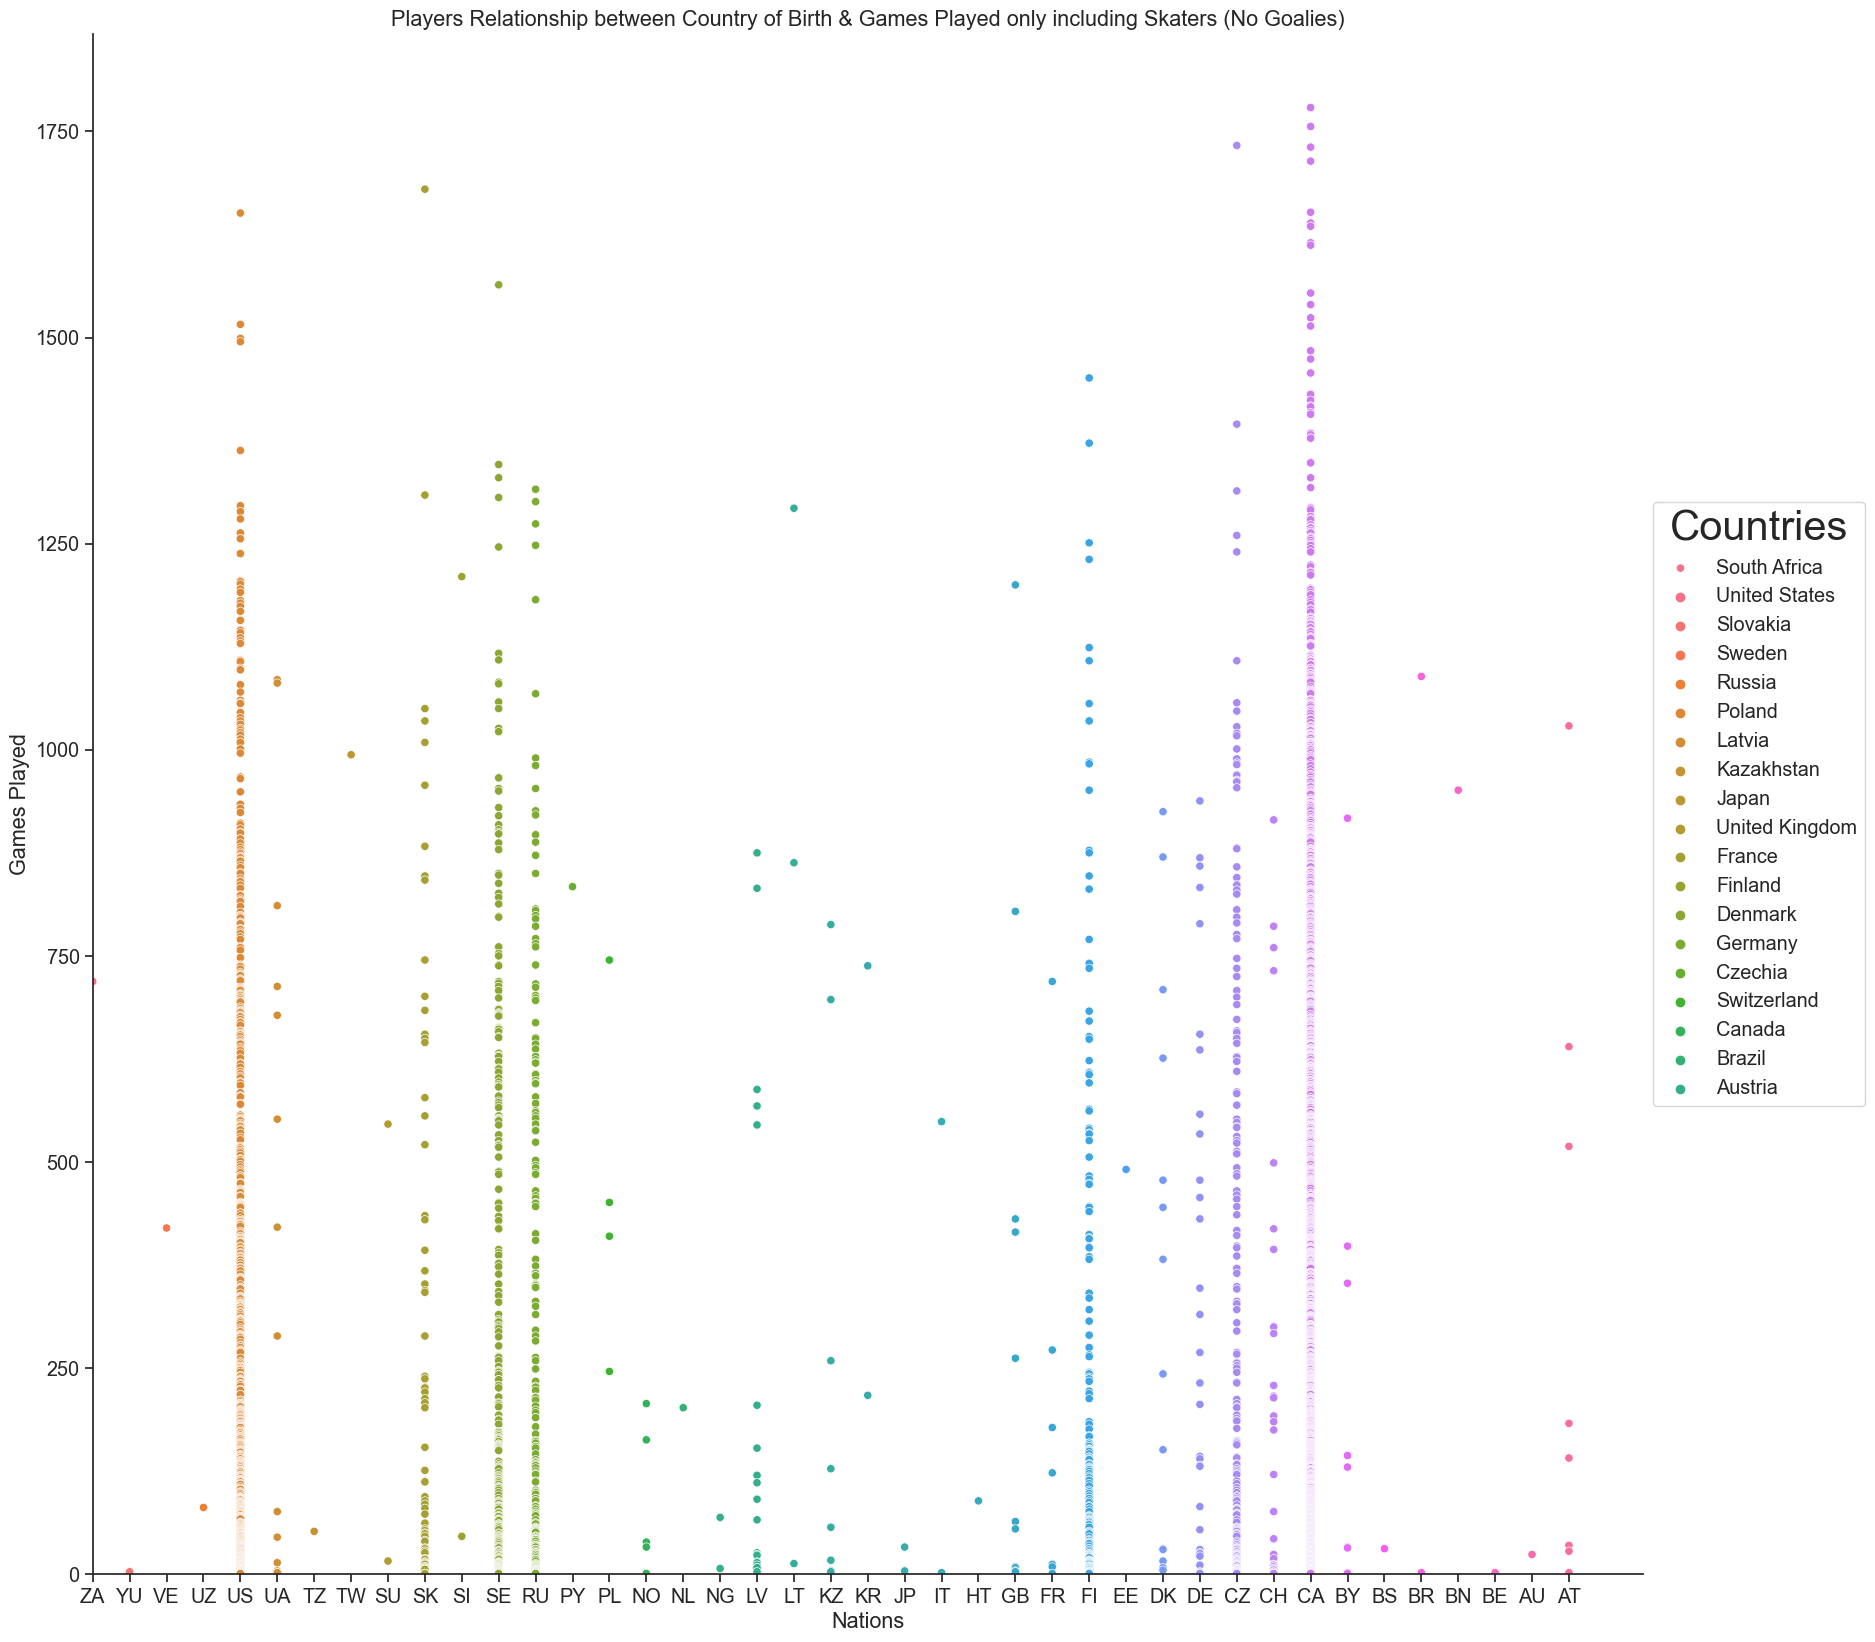

In [22]:
fig = plt.figure(figsize=(20,20))
d1=df.drop(columns='goalie_games_played')
d2=d1.drop(columns='goalie_wins')
d3=d2.drop(columns='goalie_losses')
d4=d3.drop(columns='goalie_ties_overtime')
d5=d4.drop(columns='save_percentage')
d6=d5.drop(columns='goals_against_average')
df1=d6.drop(columns='point_shares')
df2=df1.dropna()
df3 = df2.sort_values(by=['nationality','games_played'], ascending=False)
sns.scatterplot(data = df3, x = "nationality", y = "games_played", hue = "nationality")
plt.title('Players Relationship between Country of Birth & Games Played only including Skaters (No Goalies)')
plt.xlabel('Nations')
plt.ylabel('Games Played')
plt.ylim(0, None)
plt.xlim(0, None)
plt.legend(["South Africa","United States","Slovakia","Sweden","Russia","Poland","Latvia","Kazakhstan","Japan","United Kingdom","France","Finland","Denmark","Germany","Czechia","Switzerland","Canada","Brazil","Austria"],title='Countries',title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

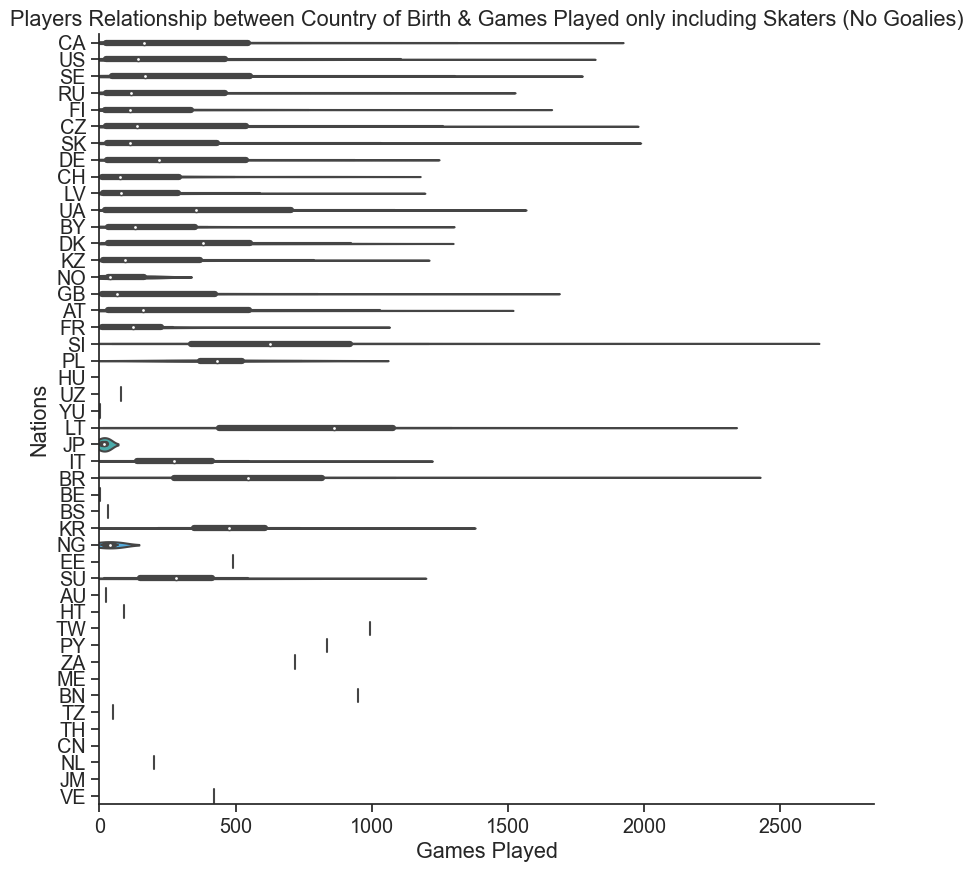

In [63]:
fig = plt.figure(figsize=(10,10))
d1=df.drop(columns='goalie_games_played')
d2=d1.drop(columns='goalie_wins')
d3=d2.drop(columns='goalie_losses')
d4=d3.drop(columns='goalie_ties_overtime')
d5=d4.drop(columns='save_percentage')
d6=d5.drop(columns='goals_against_average')
df1=d6.drop(columns='point_shares')
df2=df1.dropna()
df3 = df2.sort_values(by=['nationality','games_played'], ascending=False)
sns.violinplot(x='games_played', y='nationality', data=df3, order=df['nationality'].value_counts().index)
plt.title('Players Relationship between Country of Birth & Games Played only including Skaters (No Goalies)')
plt.ylabel('Nations')
plt.xlabel('Games Played')
plt.xlim(0, None)
plt.show()

<Figure size 1000x1000 with 0 Axes>

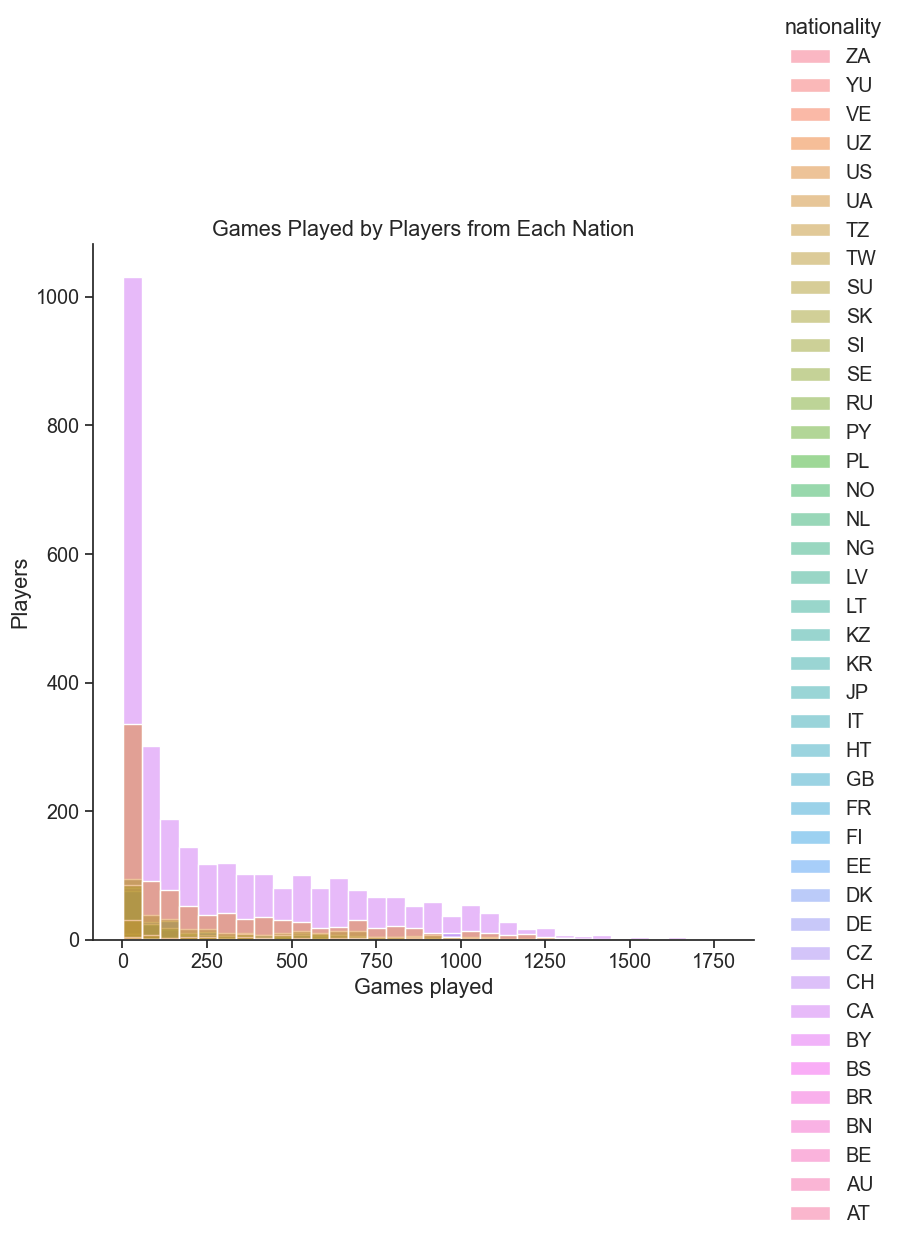

In [72]:
fig = plt.figure(figsize=(10,10))
d1=df.drop(columns='goalie_games_played')
d2=d1.drop(columns='goalie_wins')
d3=d2.drop(columns='goalie_losses')
d4=d3.drop(columns='goalie_ties_overtime')
d5=d4.drop(columns='save_percentage')
d6=d5.drop(columns='goals_against_average')
df1=d6.drop(columns='point_shares')
df2=df1.dropna()
df3 = df2.sort_values(by=['nationality','games_played'], ascending=False)
sns.displot(df3, x="games_played", hue="nationality", stat="count", common_norm=False, height=8, aspect=1)
plt.title("Games Played by Players from Each Nation")
plt.xlabel("Games played")
plt.ylabel("Players")
plt.show()